<img src="https://github.com/3vts/DeriPlot/blob/master/Files/Logo.png"/>

## Cálculo I Para Ingeniería en Sistemas

## Proyecto Final


### Estudiantes: 

 - Alvaro Alfaro Santiesteban
 - Francela Carranza Pacheco
 - Chien Ting Lin
 
### Profesor: 
Jose Antonio Otarola Cambronero
### II Cuatrimestre, 2018


# Derivadas de orden superior

## Justificación

La presente investigación se enfocará en estudiar la representación gráfica de las derivadas de orden superior, esto debido a que muchas veces la representación gráfica de un elemento matemático nos ayuda a entender mejor el problea que estamos resolviendo. Así, el presente trabajo permitiría mostrar los cambios que presentan las diferentes gráficas de funciones al resolverse sus respectivas derivadas, y profundizar los conocimientos teóricos sobre sobre caálculo diferencial, además de ofrecer una mirada mas enfocada al mundo fisico y no a la abstracción matemática.

 
# Objetivos

### Objetivo General:

Facilitar el entendimiento del tema de derivadas de orden superior, pudiendo ver la recta de la función junto con sus derivadas.

Para este proyecto hemos de utilizar el lenguaje de programación Python y las siguientes librerías:
 - NumPy: Para la generación de N cantidad números equidistantes en un rango específico
 - Plotly: Para crear las visualizaciones interactivas
 - SymPy: Esta librería nos permite resolver ecuaciones de una manera sencilla

### Objetivos específicos:

1. Mostrar las fórmulas y los ejemplos de las derivadas de orden superior para comprender la materia que hemos visto durante el curso
2. Definir de una manera mas gráfica el concepto de la derivada de orden superior 

# Marco Teórico

Los orígenes del Cálculo estuvieron motivados por el deseo de resolver diversos problemas vinculados al movimiento de los cuerpos, simplificando, podemos destacar que dentro de los problemas principales esta el determinar la tangente a una curva en un punto (el problema de las tangentes).
El concepto de derivada es el que permite resolver satisfactoriamente dicho problema. La derivada, no se formuló sino hasta el siglo XVII. Fue el descubrimiento efectuado por Sir Isaac Newton (1642 - 1727) lo que inició el magnífico desarrollo del Cálculo diferencial

### Concepto de derivada

Para entender los resultados del Cálculo diferencial es necesario, antes que nada, comprender la idea básica del mismo: el concepto de derivada. La derivada de una función puede interpretarse geométricamente como la pendiente de una curva, y físicamente como una razón “instantánea” de cambio.

La definición matemática de una derivada es la siguiente:

$\displaystyle{\lim_{h \rightarrow{0}}{\frac{f'(x+h)-f'(x)}{h}}}$

### Derivadas de orden superior

Para una función cualquiera $f$, al calcular su derivada, obtenemos una nueva función $f'$ a la que se le puede calcular su derivada

La función $(f')'$ se suele escrbir $f''$ y recibe el nombre de segunda derivada de $f$. Si $f''$ existe, se dice que, $f$ es dos veces derivable.

De manera similar podemos definir $(f'')'$ = $f'''$ o $f^3$

La notación usual es:  
$f' = f^1, f'' = f^2, f''' = f^3, ..., f^{k+1} = (f^k)'$

Las distintas funciones $f^k$ para $k ≥ 2$ son llamadas derivadas de orden superior.

Por ejemplo podemos decir que dada la función $f(x)=2x^4-3x+3$ sus derivadas son:

$f'(x)=8x^3-3$  
$f''(x)=24x^2$  
$f'''(x)=48x$

Y su representacion gráfica sería la siguiente:

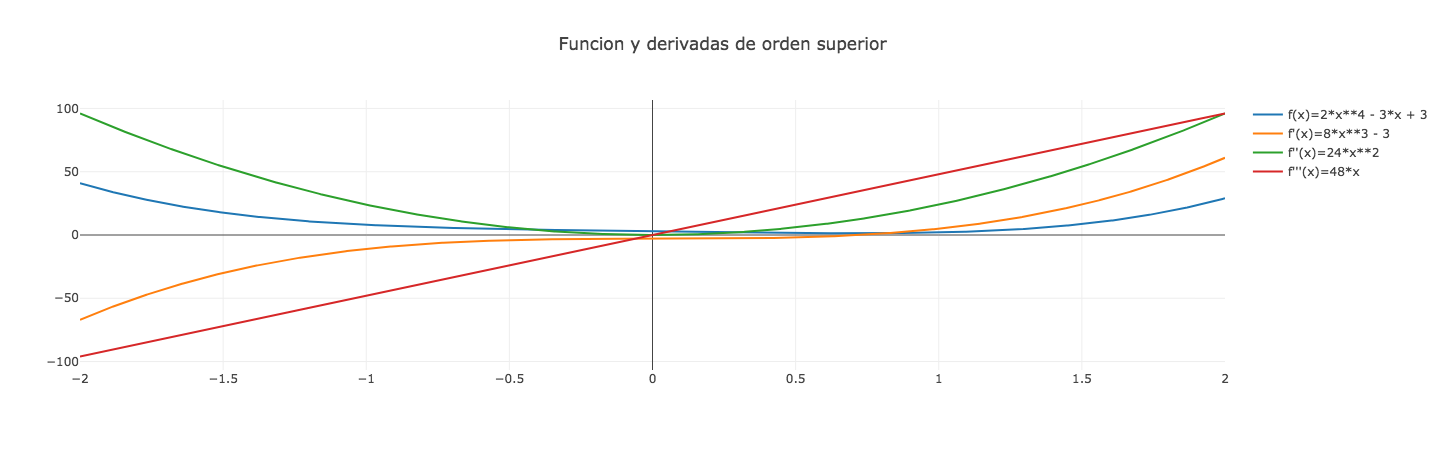

In [2]:
plot(2*x**4-3*x+3, derivatives=3, xlower_limit=-2, xupper_limit=2)

### Utilizando Python para graficar las derivadas de orden superior
Motivados por el hecho de que la mayoría de los cursos de matemática se centran en la parte abstracta de como resolver los problemas y que las herramientas para generación de gráficos que existen actualmente son muchas veces muy complejas de utilizar, nos dimos a la tarea de crear un programa en el que fuera mas sencillo crear visualizaciones. Debido a que nuestra investigación esta centrada en las derivadas de orden superior el programa está diseñado para grafica las mismas

Se detalla el código a continuación:

In [1]:
import plotly
import numpy as np
from sympy import *
import plotly.graph_objs as go

x = Symbol('x')

def plot(function, *, derivatives=1, xlower_limit=-10, xupper_limit=10, ylower_limit=0, yupper_limit=0, points=1000):
    """Función para graficar derivadas de orden superior dada una función f(x).
    
    Keyword arguments:
    ------------------
    function -- Cadena de texto que contiene f(x)
    derivatives -- Cantidad de derivadas a graficar (default 1)
    xlower_limit -- Límite inferior del eje X (default -10)    
    xupper_limit -- Límite superior del eje X (default 10)
    ylower_limit -- Límite inferior del eje Y (default 0)
    yupper_limit -- Límite superior del eje y (default 0)
    points -- Cantidad de puntos a generar en el eje X (default 1000)
    """

    #Generar valores equidistantes para el eje X
    x_values = np.linspace(xlower_limit, xupper_limit, points)

    #Definir límites de visualización para el eje Y
    if ylower_limit == 0 and yupper_limit == 0:
        yaxis_dict = dict(autorange = True)
    else:
        yaxis_dict = dict(range = [ylower_limit, yupper_limit])

    #Definir el diseño para la gráfica
    layout_dict = dict(
        layout = go.Layout(
            title="Funcion y derivadas de orden superior",
            yaxis=yaxis_dict
        ))

    
    #Ciclo que calcula las derivadas y las agrega a la variable data
    data = dict(data = list())
    for n in range(derivatives + 1):
        f = lambdify(x, function, 'numpy')
        fx = f(x_values) if type(f(x_values)) is not int else np.full(points, f(x_values))

        trace = go.Scatter(
            x=x_values,
            y=fx,
            name=f'''f{"'"*n}(x)={function}'''
            )

        data['data'].append(trace)
        #Calcular la siguiente derivada
        function = function.diff(x)

    #Mostrar el gráfico
    plotly.offline.iplot({**data, **layout_dict})

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Como puede notarse en el código anterior se pueden definir tanto los límites para ambos ejes ($X$ y $Y$) como la cantidad de puntos a generar en el eje $X$ y la cantidad de derivadas que queremos graficar. A continuación un ejemplo en el que vamos a utilizar todos los parámetros:

 - Graficar 5 derivadas 
 - Con un eje $X$ entre los valores -$5$ y $5$ 
 - Va a contener 1500 puntos equidistantes en el eje $X$
 - Un eje $Y$ entre los valores $-250$ y $250$ 
 - La función será: $4x^4+2x^3-12\sin(x)^2$

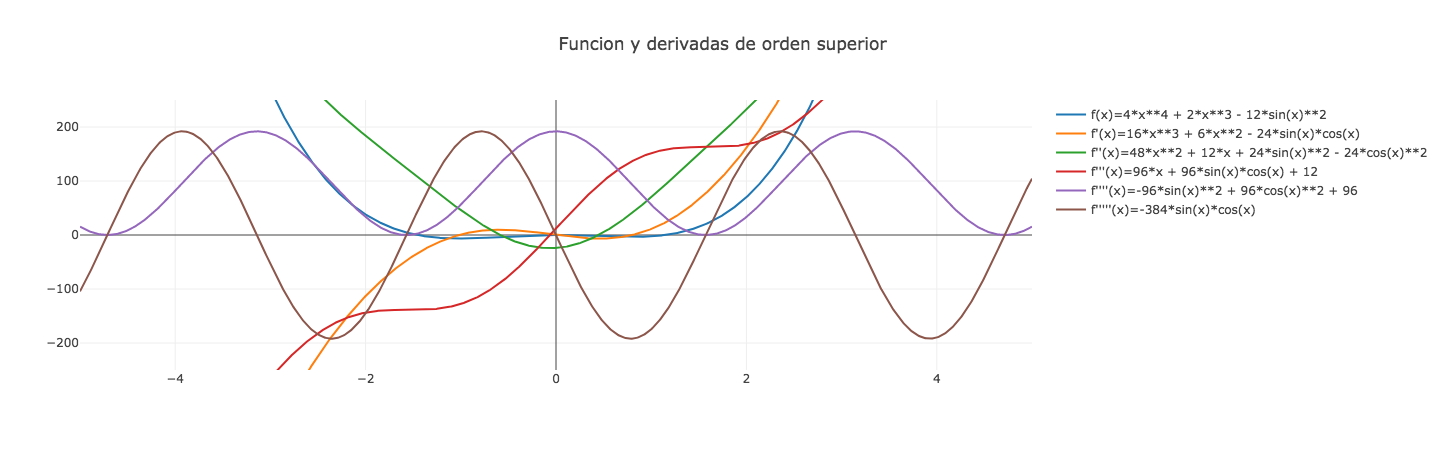

In [3]:
plot(4*x**4+2*x**3-12*sin(x)**2, derivatives=5, xlower_limit=-5, xupper_limit=5, ylower_limit=-250, yupper_limit=250, points=1500)

# Conclusión
Como resultado de la investigación matemática presentada, se pretende demostrar que es más fácil comprender las teorias matemáticas cuando se tiene una herramienta para la generación de gráficas ya que permite poner ua representación del mundo real a un problema abstracto

## Bibliografía:
 - Beltrán Beltrán J.C. Cálculo de derivadas de orden superior. Recuperado de: http://www.calculo.jcbmat.com/id444.htm
 - Stewart, James (2002). Calculus (5ª edición). Brooks Cole. ISBN 978-0-534-39339-7
 - Plotly User Guide in Python. Recuperado de: https://plot.ly/python/user-guide/
 - numpy.linspace. NumPy v1.14 Manual. Recuperado de: https://docs.scipy.org/doc/numpy-1.14.0/reference/generated/numpy.linspace.html
 - SymPy documentation. Recuperado de: http://docs.sympy.org/latest/index.html
 - Derivadas de orden superior. Recuperado de: https://www.aprendematematicas.org.mx/unit/derivadas-orden-superior/
 - Cálculo diferencial e integral. Javier Pérez. Recuperado de: https://www.uam.es/personal_pdi/ciencias/fchamizo/asignaturas/calc1inf1011/apjperez/calculo_cap06.pdf